In [55]:
from math import log
def bisection_root_finder(start, end, delta, fn):
    iteration = 0
    while True:
        iteration += 1
        mid = (start + end)/2.0
        diff = abs(start - end)
        print("iteration=", iteration, " mid=", mid, " diff =", diff)
        if diff < delta:
            # loop while True with break mimics do...while in Python
            break
        if fn(mid) == 0:
            # worth checking, but unlikely to happen
            return mid
        elif fn(start)*fn(mid) < 0:
            # lower sector contains the root - fn changes sign in going from start to mid
            end = mid
        else:
            # now, by elimination, upper sector must contain the root
            start = mid
    # round the result to the correct number of d.p. and return in a dict quoting uncertainty
    # - round(a, b) rounds the value a to b d.p.'s
    # - log(delta, 10) returns the number of powers of 10 in delta, 
    # - e.g. log(1E-10, 10) = -10
    # - multiply by -1, round to nearest int, this is the number of d.p.'s at which to round(mid) 
    num_dps = round(-1*log(delta, 10))
    return {'root': round(mid, num_dps), 'tol': delta}

In [56]:
squared = lambda x: x**2 - 3
bisection_root_finder(start=0, end=5, delta=1E-15, fn=squared)

iteration= 1  mid= 2.5  diff = 5
iteration= 2  mid= 1.25  diff = 2.5
iteration= 3  mid= 1.875  diff = 1.25
iteration= 4  mid= 1.5625  diff = 0.625
iteration= 5  mid= 1.71875  diff = 0.3125
iteration= 6  mid= 1.796875  diff = 0.15625
iteration= 7  mid= 1.7578125  diff = 0.078125
iteration= 8  mid= 1.73828125  diff = 0.0390625
iteration= 9  mid= 1.728515625  diff = 0.01953125
iteration= 10  mid= 1.7333984375  diff = 0.009765625
iteration= 11  mid= 1.73095703125  diff = 0.0048828125
iteration= 12  mid= 1.732177734375  diff = 0.00244140625
iteration= 13  mid= 1.7315673828125  diff = 0.001220703125
iteration= 14  mid= 1.73187255859375  diff = 0.0006103515625
iteration= 15  mid= 1.732025146484375  diff = 0.00030517578125
iteration= 16  mid= 1.7321014404296875  diff = 0.000152587890625
iteration= 17  mid= 1.7320632934570312  diff = 7.62939453125e-05
iteration= 18  mid= 1.7320442199707031  diff = 3.814697265625e-05
iteration= 19  mid= 1.7320537567138672  diff = 1.9073486328125e-05
iteration= 2

{'root': 1.732050807568878, 'tol': 1e-15}

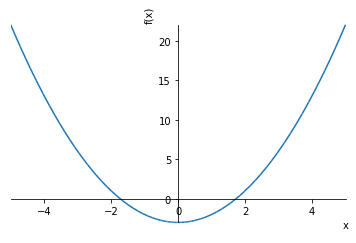

1.732050807568877

In [60]:
from sympy import *
x = symbols('x')
eq = x**2 - 3
plot(eq, (x,-5, 5))
solve(eq,x)[1].n(16)